# Exploratory Data Analysis & Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("./play_sessions.csv")
data

,userId,startTimestamp,endTimestamp
0,01HDGK5FYC1HAJ2J5W37KYRY5V,2023-10-24 10:55:57.73 UTC,2023-10-24 13:52:14.47 UTC
1,01HDGK68PBJAEWJX5TRY0SEAZE,2023-10-24 10:56:04.824 UTC,2023-10-24 12:20:59.39 UTC
2,01HDGK59GHE6EH7QM762W9GZ7X,2023-10-24 10:56:21.952 UTC,2023-10-24 12:30:38.503 UTC
3,01HDGGNBZ6NQWR1G4522A4Q5XB,2023-10-24 10:58:39.376 UTC,2023-10-24 16:56:52.894 UTC
4,01HDGK659C94THMCHGJ9V5JN31,2023-10-24 11:00:01.354 UTC,2023-10-24 12:03:17.322 UTC
...,...,...,...
3482,01HDGTBM19YR93KK9E0XMCM0E5,2023-10-31 23:15:16.416 UTC,2023-10-31 23:32:33.057 UTC
3483,01HDGT9596SVD12YJ1N7Z9NZKX,2023-10-31 23:22:54.286 UTC,2023-10-31 23:22:57.174 UTC
3484,01HDGGWRKXY5YSQ5KCD75EDNMA,2023-10-31 23:26:42.444 UTC,2023-10-31 23:43:05.666 UTC
3485,01HDGGQHN9TM6QTYMVJZKHT1WY,2023-10-31 23:35:06.122 UTC,2023-10-31 23:43:16.743 UTC


In [3]:
data.describe()

,userId,startTimestamp,endTimestamp
count,3487,3487,3487
unique,855,3487,3485
top,01HDGFFDZ4Y6W10JY8B0RBQXS0,2023-10-24 10:55:57.73 UTC,2023-10-31 15:40:16.962 UTC
freq,34,1,2


Note that there are 855 users. User 01HDGFFDZ4Y6W10JY8B0RBQXS0 has logged in 34, more than any other player. The number of times a user logs in could indicate player engagement.

In [4]:
data["startTimestamp"] = pd.to_datetime(data["startTimestamp"], format="mixed")
data["endTimestamp"] = pd.to_datetime(data["endTimestamp"], format="mixed")

In [5]:
data["elapsedTime"] = (data["endTimestamp"] - data["startTimestamp"]).dt.total_seconds() / (60 * 60)

Mean total time spent per user (in hours):  4.314657136452242
Std of total time spent per user (in hours):  6.917327748205486


(array([433., 134.,  63.,  50.,  25.,  26.,  21.,  15.,  14.,  12.,   8.,
          8.,   5.,   9.,   4.,   8.,   4.,   1.,   2.,   1.,   1.,   3.,
          2.,   0.,   0.,   1.,   2.,   2.,   0.,   1.]),
 array([3.87222222e-04, 1.55975304e+00, 3.11911885e+00, 4.67848467e+00,
        6.23785048e+00, 7.79721630e+00, 9.35658211e+00, 1.09159479e+01,
        1.24753137e+01, 1.40346796e+01, 1.55940454e+01, 1.71534112e+01,
        1.87127770e+01, 2.02721428e+01, 2.18315086e+01, 2.33908744e+01,
        2.49502403e+01, 2.65096061e+01, 2.80689719e+01, 2.96283377e+01,
        3.11877035e+01, 3.27470693e+01, 3.43064351e+01, 3.58658010e+01,
        3.74251668e+01, 3.89845326e+01, 4.05438984e+01, 4.21032642e+01,
        4.36626300e+01, 4.52219959e+01, 4.67813617e+01]),
 <BarContainer object of 30 artists>)

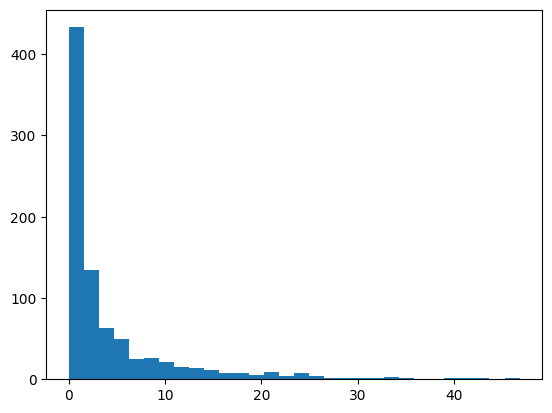

In [6]:
times = []
for userId in data["userId"].unique():
    times.append(data[data["userId"] == userId]["elapsedTime"].sum())
times = np.array(times)
print("Mean total time spent per user (in hours): ", times.mean())
print("Std of total time spent per user (in hours): ", times.std())
userTotalTimes = pd.Series(times, index=data["userId"].unique())
plt.hist(times, bins=30)

The mean total time spent on the game per player is 4.3 hours. 
However, the standard deviation is 6.9 hours.
If we observe the graph, we see that most players invest less than two hours in the game.
But there are a few players who play for many hours.
The variance in total playtime results in the high std.

The total time spent on the game could indicate player engagement.

{'whiskers': [<matplotlib.lines.Line2D at 0x219cecf10d0>,
 'caps': [<matplotlib.lines.Line2D at 0x219cee11410>,
 'boxes': [<matplotlib.lines.Line2D at 0x219cecf1810>],
 'medians': [<matplotlib.lines.Line2D at 0x219cee12510>],
 'fliers': [<matplotlib.lines.Line2D at 0x219cee12d90>],
 'means': []}

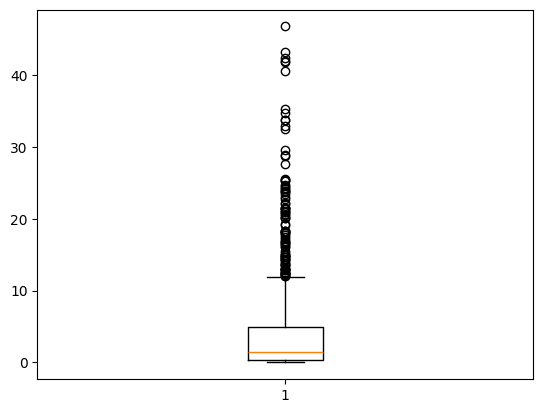

In [7]:
plt.boxplot(times)

In [8]:
for item in ["start", "end"]:
    data[item + "Day"] = data[item + "Timestamp"].dt.day
    data[item + "SecondOfDay"] = data[item + "Timestamp"].dt.hour * 60**2 \
                                    + data[item + "Timestamp"].dt.minute * 60 \
                                    + data[item + "Timestamp"].dt.second \
                                    + data[item + "Timestamp"].dt.microsecond / 10**6
data

,userId,startTimestamp,endTimestamp,elapsedTime,startDay,startSecondOfDay,endDay,endSecondOfDay
0,01HDGK5FYC1HAJ2J5W37KYRY5V,2023-10-24 10:55:57.730000+00:00,2023-10-24 13:52:14.470000+00:00,2.937983,24,39357.730,24,49934.470
1,01HDGK68PBJAEWJX5TRY0SEAZE,2023-10-24 10:56:04.824000+00:00,2023-10-24 12:20:59.390000+00:00,1.415157,24,39364.824,24,44459.390
2,01HDGK59GHE6EH7QM762W9GZ7X,2023-10-24 10:56:21.952000+00:00,2023-10-24 12:30:38.503000+00:00,1.571264,24,39381.952,24,45038.503
3,01HDGGNBZ6NQWR1G4522A4Q5XB,2023-10-24 10:58:39.376000+00:00,2023-10-24 16:56:52.894000+00:00,5.970422,24,39519.376,24,61012.894
4,01HDGK659C94THMCHGJ9V5JN31,2023-10-24 11:00:01.354000+00:00,2023-10-24 12:03:17.322000+00:00,1.054436,24,39601.354,24,43397.322
...,...,...,...,...,...,...,...,...
3482,01HDGTBM19YR93KK9E0XMCM0E5,2023-10-31 23:15:16.416000+00:00,2023-10-31 23:32:33.057000+00:00,0.287956,31,83716.416,31,84753.057
3483,01HDGT9596SVD12YJ1N7Z9NZKX,2023-10-31 23:22:54.286000+00:00,2023-10-31 23:22:57.174000+00:00,0.000802,31,84174.286,31,84177.174
3484,01HDGGWRKXY5YSQ5KCD75EDNMA,2023-10-31 23:26:42.444000+00:00,2023-10-31 23:43:05.666000+00:00,0.273117,31,84402.444,31,85385.666
3485,01HDGGQHN9TM6QTYMVJZKHT1WY,2023-10-31 23:35:06.122000+00:00,2023-10-31 23:43:16.743000+00:00,0.136284,31,84906.122,31,85396.743


(array([129., 103.,  86.,  81.,  96.,  96.,  81., 108., 107., 102., 108.,
        136., 137., 174., 334., 259., 224., 235., 206., 189., 152., 158.,
        116.,  70.]),
 array([3.00700000e+00, 3.58770988e+03, 7.17241275e+03, 1.07571156e+04,
        1.43418185e+04, 1.79265214e+04, 2.15112243e+04, 2.50959271e+04,
        2.86806300e+04, 3.22653329e+04, 3.58500358e+04, 3.94347386e+04,
        4.30194415e+04, 4.66041444e+04, 5.01888473e+04, 5.37735501e+04,
        5.73582530e+04, 6.09429559e+04, 6.45276588e+04, 6.81123616e+04,
        7.16970645e+04, 7.52817674e+04, 7.88664703e+04, 8.24511731e+04,
        8.60358760e+04]),
 <BarContainer object of 24 artists>)

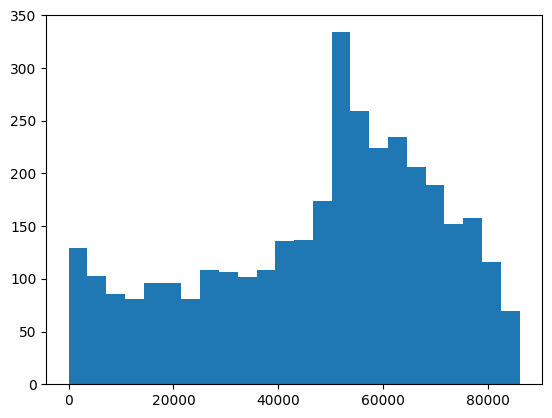

In [9]:
plt.hist(data["startSecondOfDay"], bins=24)

(array([ 58.,  74.,  90.,  91.,  92.,  89.,  76.,  97., 100., 110., 101.,
        115., 128., 166., 247., 257., 250., 234., 213., 206., 176., 176.,
        191., 150.]),
 array([  404.802   ,  3987.637875,  7570.47375 , 11153.309625,
        14736.1455  , 18318.981375, 21901.81725 , 25484.653125,
        29067.489   , 32650.324875, 36233.16075 , 39815.996625,
        43398.8325  , 46981.668375, 50564.50425 , 54147.340125,
        57730.176   , 61313.011875, 64895.84775 , 68478.683625,
        72061.5195  , 75644.355375, 79227.19125 , 82810.027125,
        86392.863   ]),
 <BarContainer object of 24 artists>)

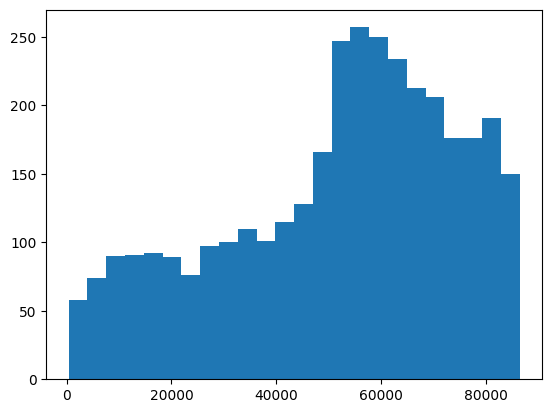

In [10]:
plt.hist(data["endSecondOfDay"], bins=24)

The times of the day the user logs in and out could indicate how likely a player is to remain engaged.

# Feature Engineering

In [11]:
beforeData = data[data["startDay"] <= 28]
afterData = data[data["startDay"] >= 29]
# afterDataFiltered = afterData[afterData["userId"].isin(beforeData["userId"].unique())].copy()
# afterDataFiltered["newElapsedTime"] = (afterDataFiltered["endTimestamp"] - afterDataFiltered["startTimestamp"]).dt.total_seconds()

In [12]:
def meanStdTimeBetweenSessions(data, userId):
    diffList = []
    prevTime = None
    currTime = None
    for row in data[data["userId"] == userId].iterrows():
        if prevTime is None:
            prevTime = row[1]["endTimestamp"]
        else:
            currTime = row[1]["startTimestamp"]
            diff = (currTime - prevTime).total_seconds()
            diffList.append(diff)
            prevTime = row[1]["endTimestamp"]
    if len(diffList) == 0:
        return -1, -1
    diffList = np.array(diffList)
    return diffList.mean(), diffList.std()


def meanStdElapsedTime(data, userId):
    s = data[data["userId"] == userId]["elapsedTime"] * 60 * 60
    s = s.to_numpy()
    return s.mean(), s.std()

SECONDS_IN_DAY = 24 * 60 * 60
def encodeTime(seconds):
    secondsSin = np.sin(2 * np.pi * seconds / SECONDS_IN_DAY)
    secondsCos = np.cos(2 * np.pi * seconds / SECONDS_IN_DAY)
    return secondsSin, secondsCos

def medianStartEndTime(data, userId):
    medianStartSecondSin, medianStartSecondCos = data[data["userId"] == userId]["startSecondOfDay"].apply(encodeTime).apply(pd.Series).median()
    medianEndSecondSin, medianEndSecondCos = data[data["userId"] == userId]["endSecondOfDay"].apply(encodeTime).apply(pd.Series).median()
    return medianStartSecondSin, medianStartSecondCos, medianEndSecondSin, medianEndSecondCos

In [15]:
lstX = []
lstY = []
userSessionCount = beforeData["userId"].value_counts()
for userId in beforeData["userId"].unique():
    # x
    temp = []
    temp.append(userSessionCount[userId])
    mean, std = meanStdTimeBetweenSessions(beforeData, userId)
    temp.append(mean)
    temp.append(std)
    mean, std = meanStdElapsedTime(beforeData, userId)
    temp.append(mean)
    temp.append(std)
    medianStartSecondSin, medianStartSecondCos, medianEndSecondSin, medianEndSecondCos = medianStartEndTime(beforeData, userId)
    temp.append(medianStartSecondSin)
    temp.append(medianStartSecondCos)
    temp.append(medianEndSecondSin)
    temp.append(medianEndSecondCos)
    lstX.append(temp)

    # y
    # 1 if player engaged again
    if userId in afterData["userId"].unique():
        lstY.append(1)
    # 0 if player did not engage again
    else:
        lstY.append(0)
    

x = np.array(lstX)
y = np.array(lstY)

# Modelling with Logistic Regression

In [62]:
split = int(len(x) * 0.8)
indices = np.random.permutation(x.shape[0])
trainIdx, testIdx = indices[:split], indices[split:]
trainX, testX = x[trainIdx,:], x[testIdx,:]
trainY, testY = y[trainIdx], y[testIdx]
print(np.unique(trainY, return_counts=True))

(array([0, 1]), array([338, 190], dtype=int64))


Note the imbalanced dataset.

In [63]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(trainX, trainY)

LogisticRegression()

# Model Evaluation and Interpretation

Mean accuracy on train set: 0.6837
Mean accuracy on test set: 0.7368
ROC AUC socre: 0.6871
              precision    recall  f1-score   support

           0       0.81      0.78      0.80        88
           1       0.60      0.64      0.62        45

    accuracy                           0.74       133
   macro avg       0.71      0.71      0.71       133
weighted avg       0.74      0.74      0.74       133



<Axes: >

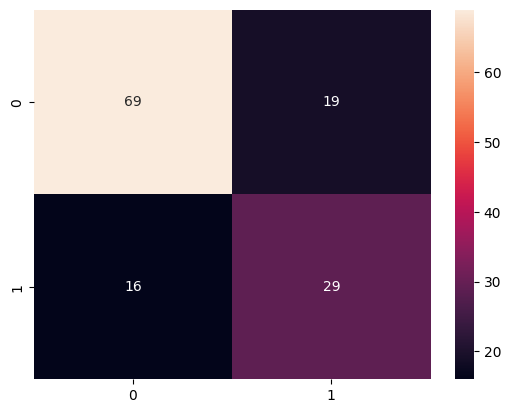

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns

predY = model.predict(testX)
predProb = model.predict_proba(testX)
print("Mean accuracy on train set: {:.4f}".format(model.score(trainX, trainY)))
print("Mean accuracy on test set: {:.4f}".format(model.score(testX, testY)))
classLabels = ["0", "1"]
print(classification_report(testY, predY, target_names=classLabels))
cfnMatrix = confusion_matrix(testY, predY)
sns.heatmap(cfnMatrix, annot=True)

ROC AUC score: 0.6871


Text(0.5, 1.0, 'ROC curve')

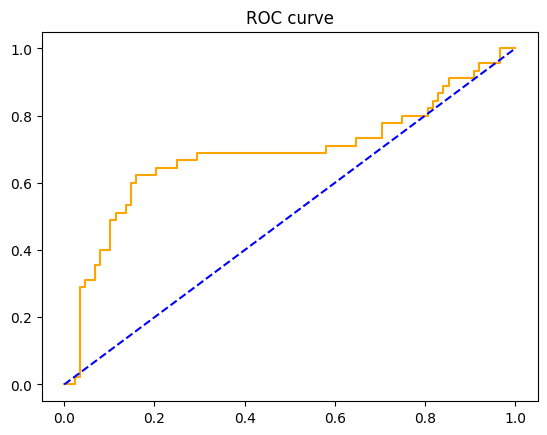

In [66]:
print("ROC AUC score: {:.4f}".format(roc_auc_score(testY, predProb[:, 1])))
fpr, tpr, thresh = roc_curve(testY, predProb[:, 1], pos_label=1)
randomProb = [0 for _ in range(len(testY))]
pFpr, pTpr, _ = roc_curve(testY, randomProb, pos_label=1)
plt.plot(fpr, tpr, color="orange")
plt.plot(pFpr, pTpr, color="blue", linestyle="--")
plt.title('ROC curve')

In [70]:
print("Model coefficients:\n", model.coef_)

Model coefficients:
 [[ 5.01688486e-07 -1.46730964e-06  6.02236602e-06 -1.52000999e-04
   2.11000440e-04  1.19364064e-07  1.01932805e-07  1.16456066e-07
   1.05518319e-07]]


We observe that the classifier's overall accuracy on the test set is 74%.
Note that the classifier performs well for precision and recall for negative samples (users that did not reengage). Therefore, it obtains a high F1 score for this class.
However, it achieves a lower score for precision and recall for positive samples.
This discrepancy may be a result of the imbalance in the data.

The ROC curve shows the trade-off between sensitivity and specificity.
The ROC AUC score is 0.69, meaning our classifier performs better than a random classifier. 
However, the low values of the model's coefficients suggest that our selected features might not be as relevant as initially thought.


We could use the model to predict which users will not reengage with the game and entice them to play.
For example, if we know that a user will not return, we could send them an email notification with an exciting event or a special offer.

# Improving the Model

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {"penalty": ["None", "l1", "l2", "elasticnet"],
          "tol": [1e-8, 1e-6, 1e-4, 1e-2, 1, 10],
          "C": [0.1, 1, 10, 100],
          "class_weight": [None, "balanced"],
          "solver": ["lbfgs", "liblinear", "newton-cholesky"]
          }
model = LogisticRegression()
clf = GridSearchCV(model, params, scoring="accuracy")
clf.fit(trainX, trainY)

In [76]:
print("Best parameters:", clf.best_params_)
print("Accuracy:", clf.best_score_)

Best parameters: {'C': 100, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-08}
Accuracy: 0.7291644204851753


After hyperparameter tuning, we find that accuracy remains close to our previous value.
This result demonstrates that hyperparameter tuning is not the right approach to improve performance in this scenario.
Instead, we should choose and engineer different input features.